# Convolutional Neural Networks

In this notebook, you will:

- Implement a CNN model from the scratch for image classification.
- Use a pretrained model and Transfer learning to solve above classification problem.

As usual, we will start by loading the packages.

In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
## Feel free to add pakages depending of your selected frame work. 
%matplotlib inline
np.random.seed(1)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
def load_dataset():
    train_dataset = h5py.File('/content/drive/MyDrive/DeepLearning/CV/HW2/datasets/train.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('/content/drive/MyDrive/DeepLearning/CV/HW2/datasets/test.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

Run the next cell to load the dataset you are going to use.

In [4]:
# Loading the data (signs)
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

In [5]:
Y_train_orig = to_categorical(Y_train_orig, num_classes=6)
# Y_test_orig = to_categorical(Y_test_orig, num_classes=6)

In [6]:
Y_train_orig = Y_train_orig.reshape(-1, 6)
Y_test_orig = Y_test_orig.reshape(-1)
print(Y_train_orig.shape)
print(Y_test_orig.shape)

(1080, 6)
(120,)


In [7]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train_orig, Y_train_orig, test_size=0.2, random_state=42)

The next cell will show you an example of a labelled image in the dataset. Feel free to change the value of `index` below and re-run to see different examples. 

y = [0. 1. 0. 0. 0. 0.]


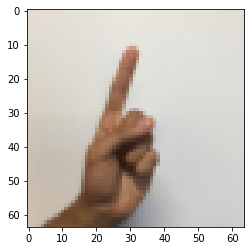

In [8]:
# Example of a picture
index = 15
plt.imshow(X_train[index], )
print ("y = " + str(np.squeeze(Y_train[index, : ])))

In [33]:
clf_model = tf.keras.Sequential()

clf_model.add(tf.keras.layers.Conv2D(32, (3 ,3), activation='relu', input_shape=(64, 64, 3)))
clf_model.add(tf.keras.layers.MaxPooling2D((2, 2)))

clf_model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
clf_model.add(tf.keras.layers.MaxPooling2D((2, 2)))

clf_model.add(tf.keras.layers.Conv2D(512, (3, 3), activation='relu'))
clf_model.add(tf.keras.layers.MaxPooling2D((2, 2)))


clf_model.add(tf.keras.layers.Flatten())
clf_model.add(tf.keras.layers.Dense(512, activation='relu'))
clf_model.add(tf.keras.layers.Dense(6, activation='softmax'))


clf_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [34]:
clf_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 12, 12, 512)       295424    
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 6, 6, 512)       

In [35]:
history = clf_model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_val, Y_val))

Epoch 1/10
27/27 [==============================] - 1s 19ms/step - loss: 32.9498 - accuracy: 0.2060 - val_loss: 1.6520 - val_accuracy: 0.1991
Epoch 2/10
27/27 [==============================] - 0s 11ms/step - loss: 1.1744 - accuracy: 0.5741 - val_loss: 0.9617 - val_accuracy: 0.6435
Epoch 3/10
27/27 [==============================] - 0s 12ms/step - loss: 0.5785 - accuracy: 0.7986 - val_loss: 0.6542 - val_accuracy: 0.7685
Epoch 4/10
27/27 [==============================] - 0s 11ms/step - loss: 0.3344 - accuracy: 0.8819 - val_loss: 0.5587 - val_accuracy: 0.8704
Epoch 5/10
27/27 [==============================] - 0s 11ms/step - loss: 0.1623 - accuracy: 0.9479 - val_loss: 0.3924 - val_accuracy: 0.8889
Epoch 6/10
27/27 [==============================] - 0s 12ms/step - loss: 0.1035 - accuracy: 0.9699 - val_loss: 0.7632 - val_accuracy: 0.8241
Epoch 7/10
27/27 [==============================] - 0s 12ms/step - loss: 0.0599 - accuracy: 0.9861 - val_loss: 0.2831 - val_accuracy: 0.9120
Epoch 8/10
2

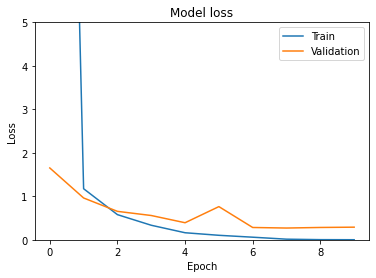

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.ylim(0, 5)
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [37]:
val_loss = history.history['val_loss']
best_epoch = val_loss.index(min(val_loss)) + 1

print("Best epoch:", best_epoch)

Best epoch: 8


In [38]:
# Calculate the predictions on the test data
predictions = clf_model.predict(X_test_orig)

# Convert the predictions to a class label
predicted_classes = np.argmax(predictions, axis=1)

# Calculate the accuracy of the model
accuracy = np.mean(predicted_classes == Y_test_orig)

# Print the accuracy
print("Accuracy:", accuracy)

# Calculate the confusion matrix
confusion_matrix = tf.math.confusion_matrix(Y_test_orig, predicted_classes, num_classes=6)

4/4 [==============================] - 0s 4ms/step
Accuracy: 0.9416666666666667


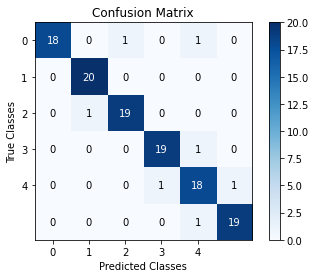

In [39]:
# plot confusion matrix
plt.imshow(confusion_matrix, cmap=plt.cm.Blues)
plt.xlabel("Predicted Classes")
plt.ylabel("True Classes")
plt.title("Confusion Matrix")
plt.colorbar()

# set tick marks
classes = np.arange(5)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# add values to the plot
confusion_matrix = confusion_matrix.numpy()
thresh = confusion_matrix.max() / 2.
for i, j in np.ndindex(confusion_matrix.shape):
    plt.text(j, i, confusion_matrix[i, j], ha="center", va="center", color="white" if confusion_matrix[i, j] > thresh else "black")

plt.show()

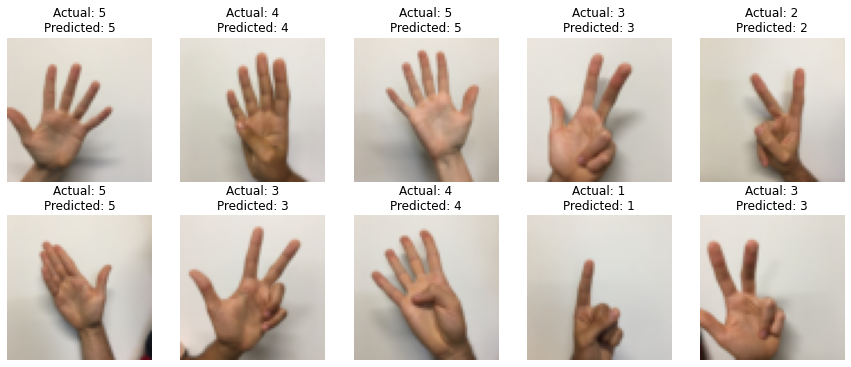

In [40]:
# Get the actual class from the test labels

actual_classes = Y_test_orig

# Choose 10 random indices from the test data
random_indices = np.random.choice(len(X_test_orig), 10, replace=False)

# Plot the randomly selected images
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
axs = axs.ravel()
for i, idx in enumerate(random_indices):
    axs[i].imshow(X_test_orig[idx])
    axs[i].set_title("Actual: {}\nPredicted: {}".format(actual_classes[idx], predicted_classes[idx]))
    axs[i].axis('off')

plt.show()

Designing the architecture of the CNN I added 4 layers of Conv2D to extract features from the input image, then flattened the 2D matrix and added 2 layers of fully connected (dense) networks, in which the last layer computes the probability of each class with the use of softmax activation function. I also one-hot-encoded the train and validation data, after playing with hyperparameters with 94% accuracy on test data it seemed promising, I think with a little bit of data manipulation in preprocessing I'll be able to up these numbers.

# Transfer learning

In [41]:
# Load the pre-trained ResNet50 model
resnet = tf.keras.applications.ResNet50(include_top=False, input_shape=(64, 64, 3))

In [42]:
# Remove the last layer
resnet.layers.pop()

In [43]:
# Freeze the layers
for layer in resnet.layers:
    layer.trainable = False


In [44]:

# Create a new model with a fully-connected layer
model = Sequential([
    resnet,
    Flatten(),
    Dense(6, activation='softmax')
])

In [45]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [46]:
# Train the model on your data
history = model.fit(X_train, Y_train, epochs=10, validation_data=(X_val, Y_val))

Epoch 1/10
27/27 [==============================] - 4s 59ms/step - loss: 0.9513 - accuracy: 0.7049 - val_loss: 0.3317 - val_accuracy: 0.8704
Epoch 2/10
27/27 [==============================] - 1s 22ms/step - loss: 0.2384 - accuracy: 0.9178 - val_loss: 0.2424 - val_accuracy: 0.9259
Epoch 3/10
27/27 [==============================] - 1s 22ms/step - loss: 0.0699 - accuracy: 0.9792 - val_loss: 0.2629 - val_accuracy: 0.9259
Epoch 4/10
27/27 [==============================] - 1s 22ms/step - loss: 0.0247 - accuracy: 0.9931 - val_loss: 0.1685 - val_accuracy: 0.9537
Epoch 5/10
27/27 [==============================] - 1s 22ms/step - loss: 0.0118 - accuracy: 1.0000 - val_loss: 0.1488 - val_accuracy: 0.9537
Epoch 6/10
27/27 [==============================] - 1s 22ms/step - loss: 0.0078 - accuracy: 1.0000 - val_loss: 0.1537 - val_accuracy: 0.9537
Epoch 7/10
27/27 [==============================] - 1s 22ms/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.1518 - val_accuracy: 0.9537
Epoch 8/10
27

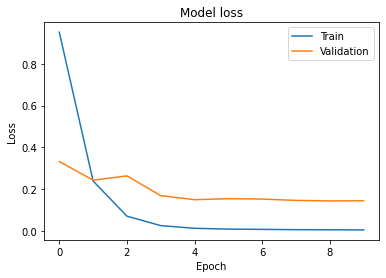

In [47]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [48]:
# Calculate the predictions on the test data
predictions = model.predict(X_test_orig)

# Convert the predictions to a class label
predicted_classes = np.argmax(predictions, axis=1)

# Calculate the accuracy of the model
accuracy = np.mean(predicted_classes == Y_test_orig)

# Print the accuracy
print("Accuracy:", accuracy)

# Calculate the confusion matrix
confusion_matrix = tf.math.confusion_matrix(Y_test_orig, predicted_classes, num_classes=6)

4/4 [==============================] - 1s 26ms/step
Accuracy: 0.9416666666666667


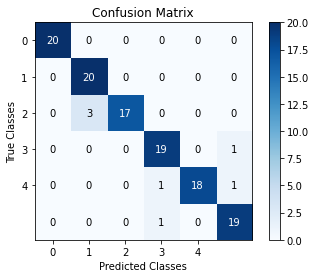

In [49]:
# plot confusion matrix
plt.imshow(confusion_matrix, cmap=plt.cm.Blues)
plt.xlabel("Predicted Classes")
plt.ylabel("True Classes")
plt.title("Confusion Matrix")
plt.colorbar()

# set tick marks
classes = np.arange(5)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# add values to the plot
confusion_matrix = confusion_matrix.numpy()
thresh = confusion_matrix.max() / 2.
for i, j in np.ndindex(confusion_matrix.shape):
    plt.text(j, i, confusion_matrix[i, j], ha="center", va="center", color="white" if confusion_matrix[i, j] > thresh else "black")

plt.show()

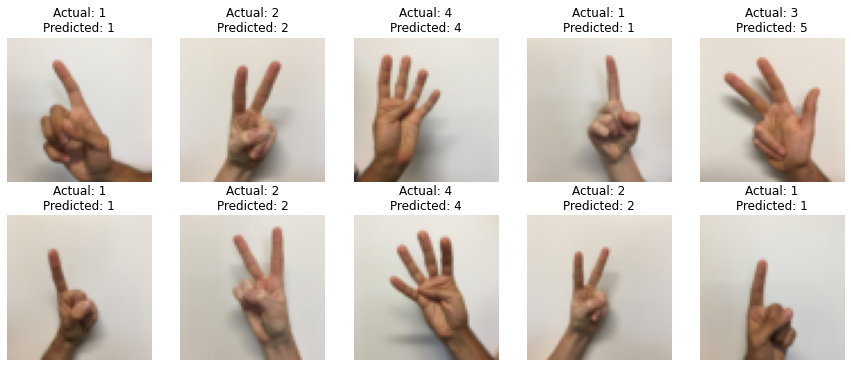

In [50]:
# Get the actual class from the test labels

actual_classes = Y_test_orig

# Choose 10 random indices from the test data
random_indices = np.random.choice(len(X_test_orig), 10, replace=False)

# Plot the randomly selected images
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
axs = axs.ravel()
for i, idx in enumerate(random_indices):
    axs[i].imshow(X_test_orig[idx])
    axs[i].set_title("Actual: {}\nPredicted: {}".format(actual_classes[idx], predicted_classes[idx]))
    axs[i].axis('off')

plt.show()

For transfer learning, I chose to use Resnet50, and since I have 6 classes to predict I removed the last layer of Resnet and replace it with 6 output layers instead of 50, after that the training process is as same as the previous model, and the accuracy of 94.1% proves that my CNN model was quite successful.

From now implemnt your model. After that use transfer learning.
Please add cells and explain yours developing steps and your results.

استفاده از زبان فارسی برای توضیحات هم مجاز است

موفق باشید